<a href="https://colab.research.google.com/github/Shreyas1608/sk/blob/main/Finalized__RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models,layers,regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
tf.__version__

'2.19.0'

In [4]:
import numpy as np, pandas as pd
np.__version__, pd.__version__

('2.0.2', '2.2.2')

In [5]:
#data ingestion
# data_path = '/sentiment_data_1000.csv'

df = pd.read_csv('sentiment_data_1000.csv')

In [6]:
#Tour of Our Data
df.head(3)

,text,label
0,"What a bad experience, I won’t come again.",0
1,The support team was rude and unhelpful.,0
2,What a wonderful day!,1


In [52]:
max=0
for i in df.text:
  length=(len(i.split()))
  if length > max:
    max=length
max

9

In [53]:
min=9
for i in df.text:
  length=(len(i.split()))
  if length < min:
    min=length
min

4

<Axes: ylabel='Count'>

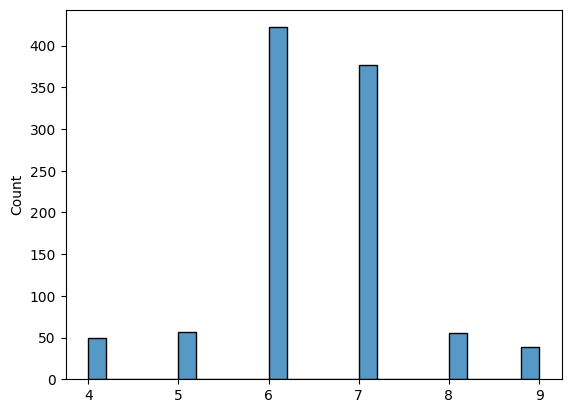

In [54]:
import seaborn as sns
lenght=[len(i.split())for i in df.text]
sns.histplot(lenght)

In [55]:
df.shape

(1000, 2)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='label'>

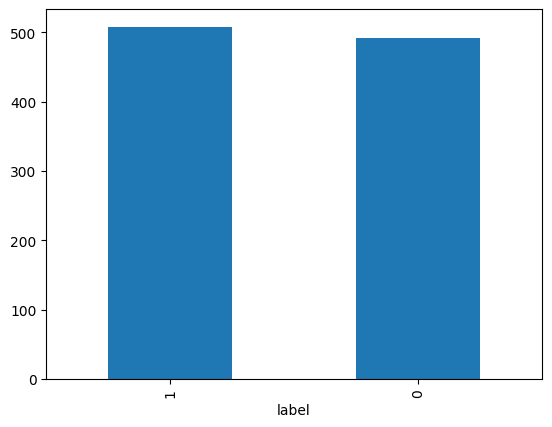

In [57]:
#class check  as we have two class
df['label'].value_counts().plot(kind='bar')

In [122]:
X = df['text']
y = df['label']

In [127]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
X = X.apply(lambda row: tokenizer.encode(row))
X[0]

[2061, 257, 2089, 1998, 11, 314, 1839, 447, 247, 83, 1282, 757, 13]

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [128]:
tokenizer.encode('I love you')

[40, 1842, 345]

In [118]:
for i in [40, 1842, 345]:
  print(tokenizer.decode([i]))

I
 love
 you


In [125]:
#tokenization
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
len(tokenizer.word_index.keys())

81

In [68]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((800,), (200,), (800,), (200,))

In [69]:
#making sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq[0], X_train_seq[1], X_train_seq[2], X_train_seq[3]

([3, 14, 15, 33, 2, 34, 35],
 [5, 24, 25, 3, 26],
 [3, 14, 15, 33, 2, 34, 35],
 [5, 27, 3, 28, 13, 6, 29])

In [70]:
max_length = 0
for i in X_train_seq:
  if len(i)>max_length:
    max_length = len(i)
print(max_length)

9


In [71]:
max = 0
for i in X_train_seq:
  if len(i)>max:
    max = len(i)
print(max)


9


In [72]:
#add padding
X_train_padded = pad_sequences(X_train_seq,padding='post',maxlen=20)
X_test_padded = pad_sequences(X_test_seq,padding='post',maxlen=20)
print(X_train_padded)

[[ 3 14 15 ...  0  0  0]
 [ 5 24 25 ...  0  0  0]
 [ 3 14 15 ...  0  0  0]
 ...
 [20 21  4 ...  0  0  0]
 [ 5 18 58 ...  0  0  0]
 [20 21  4 ...  0  0  0]]


In [73]:
print(f"The maximum token ID in the padded training data is: {X_train_padded.max()}")

The maximum token ID in the padded training data is: 81


In [74]:
for i in X_train_padded:
  print(len(i))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

In [75]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE()
#X_train_pad_sm, y_train_sm = sm.fit_resample(X_train_padded, y_train)

In [76]:
y_train_sm.value_counts()

,count
label,
1,411
0,411


## Now we will design two models


In [77]:
model1 = models.Sequential([
    #embedding layer
    layers.Embedding(input_dim=100,output_dim=32,input_length=20),
    #RNN layer(hidden layer)
    layers.SimpleRNN(units=32,activation='tanh'),
    #output layer
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [78]:
model1.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
X_train_padded.shape

(800, 20)

In [80]:
history1 = model1.fit(X_train_padded, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8089 - loss: 0.5129


In [81]:
loss, acc = model1.evaluate(X_test_padded, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Accuracy: 100.00%


In [84]:
X_train

,text
29,This product is great and works perfectly.
535,I regret buying this item.
695,This product is great and works perfectly.
557,"I love this movie, it was fantastic!"
836,This is the worst service I have ever seen.
...,...
106,I regret buying this item.
270,I regret buying this item.
860,Absolutely loved the taste of the food!
435,I am very disappointed and sad.


In [83]:
sample_text = ['Absolutely loved the taste of the food!']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=20, padding='post')
predictions = model1.predict(sample_pad)
print(predictions)
for t, p in zip(sample_text, predictions):
    print(f"Text: {t} → Sentiment: {'Positive 😊' if p > 0.5 else 'Negative 😠'} {p}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.9439134]]
Text: Absolutely loved the taste of the food! → Sentiment: Positive 😊 [0.9439134]


In [85]:
model2 = models.Sequential([
    layers.Embedding(input_dim=100,output_dim=64,input_length=20),
    layers.SpatialDropout1D(0.3),
    layers.SimpleRNN(
        units=64,
        activation='tanh',
        kernel_regularizer=regularizers.l2(0.001),
        dropout=0.3,
        recurrent_dropout=0.3
    ),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [86]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [87]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [93]:
from sklearn.base import validate_data
history2 = model2.fit(
    X_train_pad_sm, y_train_sm,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    validation_data=(X_test_padded[:50],y_test[:50]),
    verbose=1
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9898 - loss: 0.1015 - val_accuracy: 1.0000 - val_loss: 0.0796
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9949 - loss: 0.0995 - val_accuracy: 1.0000 - val_loss: 0.0786
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9926 - loss: 0.1282 - val_accuracy: 1.0000 - val_loss: 0.0775
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9916 - loss: 0.1458 - val_accuracy: 1.0000 - val_loss: 0.0764
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9978 - loss: 0.0935 - val_accuracy: 1.0000 - val_loss: 0.0754
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9975 - loss: 0.0878 - val_accuracy: 1.0000 - val_loss: 0.0744
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9897 - loss: 0.1417 - val_accuracy: 1.0000 - val_loss: 0.0735
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9946 - loss: 0.1176 - val_accuracy: 1.0000 - v

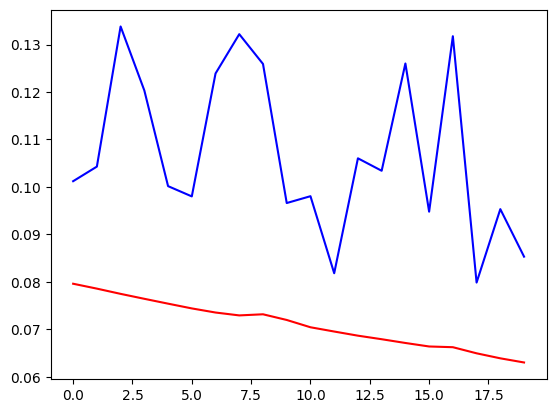

In [96]:
plt.plot(history2.history['loss'], label='Training Loss',color='b')
plt.plot(history2.history['val_loss'], label='Validation Loss',color='r')

In [97]:
def get_prediction(sample_text,model):
  sample_seq = tokenizer.texts_to_sequences(sample_text)
  sample_pad = pad_sequences(sample_seq, maxlen=20, padding='post')
  predictions = model.predict(sample_pad)
  print(predictions)
  for t, p in zip(sample_text, predictions):
    print(f"Text: {t} → Sentiment: {'Positive 😊' if p > 0.5 else 'Negative 😠'} {p}")

In [98]:
get_prediction(sample_text=['I went to movie and found This movie regret'],model=model1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.91943055]]
Text: I went to movie and found This movie regret → Sentiment: Positive 😊 [0.91943055]


In [99]:
get_prediction(sample_text=['I went to movie and found This movie regret'],model=model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
[[0.9975735]]
Text: I went to movie and found This movie regret → Sentiment: Positive 😊 [0.9975735]


In [100]:
y_train.value_counts()

,count
label,
1,411
0,389


In [ ]:
# !pip install imblearn